#  Polarized light and the Fresnel Rhomb

##### Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

### Oppgave 1: Different kinds of polarized light

In [11]:
ts = np.linspace(0,2*np.pi,100)#Tidsteg vi plotter over.
w,k,A = 1,1,1
#Over en hel periode er det vilkårlig hva vi velger z til å være, så vi
#ignorerer leddet med romlig oscillasjon med å sette kz = 0.
Ea_x = np.array([np.cos(-w*t-np.pi/5) for t in ts])#Forventer eliptisk polarisasjon da det ikke observeres noe spesielt
Ea_y = np.array([np.cos(-w*t+np.pi/6) for t in ts])#for å tro noe annet

Eb_x = np.array([np.cos(-w*t-np.pi/4) for t in ts])#Fasevinkel mellom er pi/2 OG amplitudene er like => Forventer sirkulær
Eb_y = np.array([np.cos(-w*t+np.pi/4) for t in ts])#polarisasjon

Ec_x = 1.5*np.array([np.sin(-w*t) for t in ts])#Fasevinkel mellom er 0, forventer derfor lineært polarisert lys i 
Ec_y = np.array([np.cos(-w*t-np.pi/2) for t in ts])#retning [1.5,1]

Ed_x = 2*np.array([np.sin(-w*t) for t in ts])#Forventer eliptisk polarisasjon da det ikke observeres noe spesielt
Ed_y = np.array([np.sin(-w*t-np.pi/2) for t in ts])#for å tro noe annet.

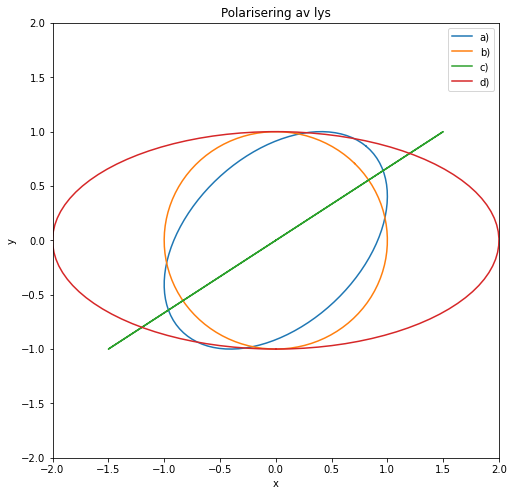

In [12]:
plt.figure(0,figsize = (8,8))
plt.title("Polarisering av lys")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot(Ea_x,Ea_y,label = "a)")#Plotter Ey mot Ex, slik at vi kan se retningen feltet varierer
plt.plot(Eb_x,Eb_y,label = "b)")
plt.plot(Ec_x,Ec_y,label = "c)")
plt.plot(Ed_x,Ed_y,label = "d)")
plt.legend()

### Oppgave 2: The Fresnel Rhomb

Kritisk vinkel er 41.1395
Apex-vinkelen som gir sirkulert polarisert lys er 47.5531 eller 55.4575 grader 
 
Ulike faser introdusert mellom TE og TM moden mhp løsning 1/løsning 2:
-5% 	81.4948 grader eller 92.7375grader
+0% 	90.0000 grader eller 90.0000grader
+5% 	93.0079 grader eller 85.6704grader


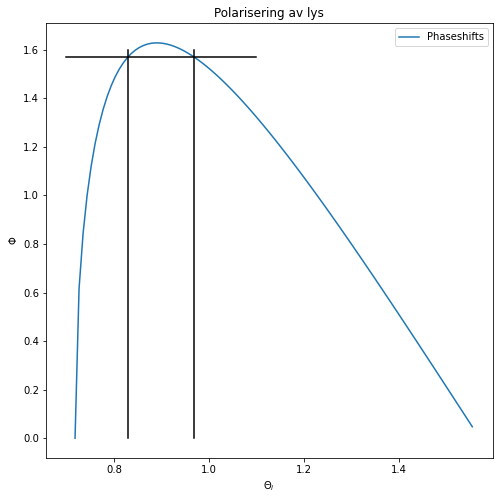

In [13]:
n = 1.52
crit = np.arcsin(1/n)
print(f"Kritisk vinkel er {crit*180/np.pi:.4f}")
thetas = np.linspace(crit, 0.99*np.pi/2, 100)
phases = np.array([phaseshift(theta) for theta in thetas]) + np.pi/2#Denne legges fordi den ble trukket fra i funksjonen

plt.figure(1,figsize = (8,8))#plotter graf for å få en ide om hvor løsningen befinner seg på theta-aksen
plt.title("Polarisering av lys")
plt.xlabel("$\Theta_i$")
plt.ylabel("$\Phi$")
plt.plot(thetas,phases,label = "Phaseshifts")#Plotter Ey mot Ex, slik at vi kan se retningen feltet varierer
plt.legend()

solution1 = fsolve(phaseshift,0.8)[0] #Denne metoden krever gjett som ligger i nærheten av nullpunktet. Setter het x0 = 0.8
solution2 = fsolve(phaseshift,1.0)[0] #Ser på grafen at det er enda ett nullpunkt som ligger litt nærmere x0 = 1 
print(f"Apex-vinkelen som gir sirkulert polarisert lys er {180*solution1/np.pi:.4f} eller {180*solution2/np.pi:.4f} grader \n \nUlike faser introdusert mellom TE og TM moden mhp løsning 1/løsning 2:")
print(f"-5% \t{(np.pi/2 + phaseshift(0.95*solution1))*180/np.pi:.4f} grader eller {(np.pi/2 + phaseshift(0.95*solution2))*180/np.pi:.4f}grader")
print(f"+0% \t{(np.pi/2 + phaseshift(1*solution1))*180/np.pi:.4f} grader eller {(np.pi/2 + phaseshift(1*solution2))*180/np.pi:.4f}grader")
print(f"+5% \t{(np.pi/2 + phaseshift(1.05*solution1))*180/np.pi:.4f} grader eller {(np.pi/2 + phaseshift(1.05*solution2))*180/np.pi:.4f}grader")

plt.plot((solution1,solution1),(0,1.6),'k-') #Plotter her linje inn med løsningene for å sjekke om de gir mening. 
plt.plot((solution2,solution2),(0,1.6),'k-') #Kan se at en begge løsningene er nullpunkter for funksjonen!
plt.plot((0.7,1.1),(np.pi/2,np.pi/2),'k-')